# Mobile Price Classification

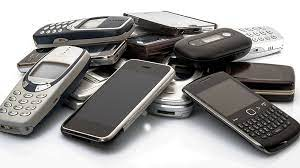

# Table of Contents

* [Libraries](#LBR)
* [Data Loading](#Data)
* [Data Dictionary](#Data-Dictionary)
* [EDA and Data Visualization](#EDA)
    - [Battery Power](#BP)
    - [Bluetooth](#B)
    - [Clock Speed](#CS)
    - [Dual-sim](#DS)
    - [Front Camera](#FC)
    - [4G](#4G)
    - [Internal Memory](#IM)
    - [Mobile Depth](#MD)
    - [Weight of the Phone](#WP)
    - [Number of Cores](#NC)
    - [Primary Camera Mega Pixels](#PC)
    - [Pixel Resolution Height](#PRH)
    - [Pixel Resolution Width](#PRW)
    - [RAM](#R)
    - [Screen Height](#SH)
    - [Screen Width](#SW)
    - [Talk Time](#TT)
    - [3G](#3G)
    - [Touch Screen](#TS)
    - [Wi-fi](#W)
* [Preprocessing](#PP)
* [Models](#Models)
    - [Logistic Regression](#LR)
    - [Naive Bayes](#NB)
    - [Decision Tree Classifier](#DTC)
    - [KNN](#KNN)
    - [Random Forest Classifier](#RFC)
    - [SVM](#SVM)


<a id="LBR"></a>
# Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick
from sklearn.model_selection import train_test_split, KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score,roc_auc_score,plot_confusion_matrix
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_validate

pd.set_option('display.max_columns', None)



import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


<a id="Data"></a>
# Data Loading

In [ ]:
train = pd.read_csv('/kaggle/input/mobile-price-classification/train.csv')
test = pd.read_csv('/kaggle/input/mobile-price-classification/test.csv')

<a id="Data Dictionary"></a>
# Data Dictionary




**battery_power** = Total energy a battery can store in one time measured in mAh.

**blue** = Has bluetooth or not. | 1: Has , 0: doesnt have

**clock_speed** = Speed at which microprocessor executes instructions.

**dual_sim** = Has dual sim support or not | 1: support, 0: doesnt support

**fc** = Front Camera mega pixels.

**four_g** = Has 4G or not. | 1: Has , 0: doesnt have

**int_memory** = Internal memory in gigabytes.

**m_dep** = Mobile Depth in cm.

**mobile_wt** = Weight of mobile phone.

**n_cores** = Number of cores of processor.

**pc** = Primary Camera mega pixels.

**px_height** = Pixel Resolution Height.

**px_width** = Pixel Resolution Width.

**ram** = Random Access Memory in Mega Bytes.

**sc_h** = Screen Height of mobile in cm.

**sc_w** = Screen Width of mobile in cm.

**talk_time** = Longest time that a single battery charge will last when you are.

**three_g** = Has 3G or not. | 1: Has, 0:Doesnt have

**touch_screen** = Has touch screen or not. | 1: Has, 0:Doesnt have

**wifi** = Has wifi or not. | 1:Has, 0:Doesnt have

**price_range** = This is the target variable. | 3:Very High Cost, 2:High Cost, 1:Medium Cost, 0:Low Cost







<a id="EDA"></a>
# EDA and Data Visualization

In [ ]:
train.head(10)

In [ ]:
train.info()

In [ ]:
train.describe()

<a id="BP"></a>
## Battery Power

In [ ]:
sns.set(rc={"figure.dpi":100})
sns.set_context('paper')
sns.set_style("ticks")

fig = plt.figure(figsize=(15,12))
gs = fig.add_gridspec(2, 2)
gs.update(wspace=0.3, hspace=0.4)
fig.text(0.085,0.95,'Battery power and its effect of the price range ', fontfamily='serif',fontsize=15, fontweight='bold')
sns.set_palette('Spectral')

ax0 = fig.add_subplot(gs[0, 0])
ax1 = fig.add_subplot(gs[0, 1])
ax2 = fig.add_subplot(gs[1,0],ylim=(0, 3000),xlim=(0,5))
ax3 = fig.add_subplot(gs[1,1],ylim=(0, 3000))

#Axis 0 

ax0.grid(color='gray', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.kdeplot(x='battery_power',
            data=train,
            shade=True,
            ax=ax0,
            linewidth = 0
            )
ax0.yaxis.set_major_formatter(mtick.PercentFormatter(1, decimals=3))
ax0.set_xlabel("")
ax0.set_ylabel("")
ax0.set_title('Distribution',fontsize=12,fontfamily='serif',fontweight='bold',x=0,y=1)
ax0.spines['top'].set_visible(False)
ax0.spines['right'].set_visible(False)
ax0.spines['left'].set_visible(False)


#Axis 1 

ax1.grid(color='gray', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.kdeplot(x='battery_power',
           hue='price_range',
           shade=True,
           data=train,
           palette='Spectral',
           ax=ax1,
           fill=True,
           alpha=.3, 
           linewidth=0
           
           )
ax1.yaxis.set_major_formatter(mtick.PercentFormatter(1, decimals=3))
ax1.set_xlabel("")
ax1.set_ylabel("")
ax1.set_title('Distribution by Price Range',fontsize=12,fontfamily='serif',fontweight='bold',x=0.1,y=1)
ax1.legend(['Low Cost ', 'Medium Cost','High Cost','Very High Cost'],fontsize=6,frameon=False)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['left'].set_visible(False)

#Axis 2

ax2.grid(color='gray', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.boxenplot(y='battery_power',
              data=train,
              ax=ax2,
              zorder=3,
              linewidth=0.4)

ax2.set_xlabel("")
ax2.set_ylabel("")
ax2.set_title('Distribution',fontsize=12,fontfamily='serif',fontweight='bold',x=0,y=1.15)
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['left'].set_visible(False)

#Axis3

ax3.grid(color='gray', linestyle='-', axis='y', zorder=0,  dashes=(1,5))
sns.boxenplot(x='price_range',
              y='battery_power',
              data=train,
              ax=ax3,
              zorder=3,
              linewidth=0.4
           
            )

ax3.set_xlabel("")
ax3.set_ylabel("")
ax3.set_title('Distribution by Price Range',fontsize=12,fontfamily='serif',fontweight='bold',x=0.1,y=1.15)
ax3.set_xticklabels(['Low Cost ', 'Medium Cost','High Cost','Very High Cost'])
ax3.spines['top'].set_visible(False)
ax3.spines['right'].set_visible(False)
ax3.spines['left'].set_visible(False)

fig.show()





<a id="B"></a>
## Bluetooth

In [ ]:
fig = plt.figure(figsize=(15,4))
gs = fig.add_gridspec(1, 2)
gs.update(wspace=0.3, hspace=0)
fig.text(0.120,1.1,'Bluetooth and its effect on the price ', fontfamily='serif',fontsize=15, fontweight='bold')
ax0 = fig.add_subplot(gs[0, 0])
ax1 = fig.add_subplot(gs[0, 1])


sns.countplot(x='blue',
           data=train,
            palette='Blues',
           ax=ax0)
ax0.grid(color='gray', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
ax0.set_title('Distribution',fontsize=12,fontfamily='serif',fontweight='bold',x=0.1,y=1)
ax0.spines['top'].set_visible(False)
ax0.spines['right'].set_visible(False)
ax0.spines['left'].set_visible(False)
ax0.set_xticklabels(["Doesnt Support","Support"])
ax0.set_xlabel("")
ax0.set_ylabel("")   

sns.countplot(x='blue',
             data=train,
             hue='price_range',
             ax=ax1)
ax1.grid(color='gray', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
ax1.set_title('Distribution by Price Range',fontsize=12,fontfamily='serif',fontweight='bold',x=0.25,y=1)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['left'].set_visible(False)
ax1.get_legend().remove()
legend_labels, _= ax1.get_legend_handles_labels()
ax1.legend(legend_labels, ['Low Cost ', 'Medium Cost','High Cost','Very High Cost'], ncol=4, bbox_to_anchor=(-0.30, 1.22))
ax1.set_xticklabels(["Doesnt Support","Support"])
ax1.set_xlabel("")
ax1.set_ylabel("")

fig.show()

<a id="CS"></a>
## Clock Speed

In [ ]:
fig = plt.figure(figsize=(15,12))
gs = fig.add_gridspec(2, 2)
gs.update(wspace=0.3, hspace=0.4)
fig.text(0.085,0.95,'Clock Speed and its effect of the price range ', fontfamily='serif',fontsize=15, fontweight='bold')
sns.set_palette('Spectral')

ax0 = fig.add_subplot(gs[0, 0])
ax1 = fig.add_subplot(gs[0, 1])
ax2 = fig.add_subplot(gs[1,0],ylim=(0,5))
ax3 = fig.add_subplot(gs[1,1],ylim=(0,5))

#Axis 0 

ax0.grid(color='gray', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.kdeplot(x='clock_speed',
            data=train,
            shade=True,
            ax=ax0,
            linewidth = 0
            )
ax0.yaxis.set_major_formatter(mtick.PercentFormatter(1, decimals=3))
ax0.set_xlabel("")
ax0.set_ylabel("")
ax0.set_title('Distribution',fontsize=12,fontfamily='serif',fontweight='bold',x=0,y=1.05)
ax0.spines['top'].set_visible(False)
ax0.spines['right'].set_visible(False)
ax0.spines['left'].set_visible(False)


#Axis 1 

ax1.grid(color='gray', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.kdeplot(x='clock_speed',
           hue='price_range',
           shade=True,
           data=train,
           palette='Spectral',
           ax=ax1,
           fill=True,
           alpha=.3, 
           linewidth=0
           
           )
ax1.yaxis.set_major_formatter(mtick.PercentFormatter(1, decimals=3))
ax1.set_xlabel("")
ax1.set_ylabel("")
ax1.set_title('Distribution by Price Range',fontsize=12,fontfamily='serif',fontweight='bold',x=0.1,y=1.05)
ax1.legend(['Low Cost ', 'Medium Cost','High Cost','Very High Cost'],fontsize=6,frameon=False)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['left'].set_visible(False)

#Axis 2

ax2.grid(color='gray', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.boxenplot(y='clock_speed',
              data=train,
              ax=ax2,
              zorder=3,
              linewidth=0.4)

ax2.set_xlabel("")
ax2.set_ylabel("")
ax2.set_title('Distribution',fontsize=12,fontfamily='serif',fontweight='bold',x=0,y=1.15)
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['left'].set_visible(False)

#Axis3

ax3.grid(color='gray', linestyle='-', axis='y', zorder=0,  dashes=(1,5))
sns.boxenplot(x='price_range',
              y='clock_speed',
              data=train,
              ax=ax3,
              zorder=3,
              linewidth=0.4
           
            )

ax3.set_xlabel("")
ax3.set_ylabel("")
ax3.set_title('Distribution by Price Range',fontsize=12,fontfamily='serif',fontweight='bold',x=0.1,y=1.15)
ax3.set_xticklabels(['Low Cost ', 'Medium Cost','High Cost','Very High Cost'])
ax3.spines['top'].set_visible(False)
ax3.spines['right'].set_visible(False)
ax3.spines['left'].set_visible(False)

fig.show()

<a id="DS"></a>
## Dual Sim

In [ ]:
fig = plt.figure(figsize=(15,4))
gs = fig.add_gridspec(1, 2)
gs.update(wspace=0.3, hspace=0)
fig.text(0.120,1.1,'Dual-sim and its effect on the price ', fontfamily='serif',fontsize=15, fontweight='bold')
ax0 = fig.add_subplot(gs[0, 0])
ax1 = fig.add_subplot(gs[0, 1])


sns.countplot(x='dual_sim',
           data=train,
            palette='bone',
           ax=ax0)
ax0.grid(color='gray', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
ax0.set_title('Distribution',fontsize=12,fontfamily='serif',fontweight='bold',x=0.1,y=1)
ax0.spines['top'].set_visible(False)
ax0.spines['right'].set_visible(False)
ax0.spines['left'].set_visible(False)
ax0.set_xticklabels(["Doesnt Support","Support"])
ax0.set_xlabel("")
ax0.set_ylabel("")   

sns.countplot(x='dual_sim',
             data=train,
             hue='price_range',
             ax=ax1)
ax1.grid(color='gray', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
ax1.set_title('Distribution by Price Range',fontsize=12,fontfamily='serif',fontweight='bold',x=0.25,y=1)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['left'].set_visible(False)
ax1.get_legend().remove()
legend_labels, _= ax1.get_legend_handles_labels()
ax1.legend(legend_labels, ['Low Cost ', 'Medium Cost','High Cost','Very High Cost'], ncol=4, bbox_to_anchor=(-0.30, 1.22))
ax1.set_xticklabels(["Doesnt Support","Support"])
ax1.set_xlabel("")
ax1.set_ylabel("")

fig.show()

<a id="FC"></a>
## Front Camera

In [ ]:
fig = plt.figure(figsize=(15,12))
gs = fig.add_gridspec(2, 2)
gs.update(wspace=0.3, hspace=0.4)
fig.text(0.085,0.95,'Front Camera mega-pixels and its effect on the price range', fontfamily='serif',fontsize=15, fontweight='bold')
sns.set_palette('Spectral')

ax0 = fig.add_subplot(gs[0, 0])
ax1 = fig.add_subplot(gs[0, 1])
ax2 = fig.add_subplot(gs[1,0],ylim=(0,20))
ax3 = fig.add_subplot(gs[1,1],ylim=(0,20))

#Axis 0 

ax0.grid(color='gray', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.kdeplot(x='fc',
            data=train,
            shade=True,
            ax=ax0,
            linewidth = 0
            )
ax0.yaxis.set_major_formatter(mtick.PercentFormatter(1, decimals=3))
ax0.set_xlabel("")
ax0.set_ylabel("")
ax0.set_title('Distribution',fontsize=12,fontfamily='serif',fontweight='bold',x=0,y=1.05)
ax0.spines['top'].set_visible(False)
ax0.spines['right'].set_visible(False)
ax0.spines['left'].set_visible(False)


#Axis 1 

ax1.grid(color='gray', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.kdeplot(x='fc',
           hue='price_range',
           shade=True,
           data=train,
           palette='Spectral',
           ax=ax1,
           fill=True,
           alpha=.3, 
           linewidth=0
           
           )
ax1.yaxis.set_major_formatter(mtick.PercentFormatter(1, decimals=3))
ax1.set_xlabel("")
ax1.set_ylabel("")
ax1.set_title('Distribution by Price Range',fontsize=12,fontfamily='serif',fontweight='bold',x=0.1,y=1.05)
ax1.legend(['Low Cost ', 'Medium Cost','High Cost','Very High Cost'],fontsize=6,frameon=False)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['left'].set_visible(False)

#Axis 2

ax2.grid(color='gray', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.boxenplot(y='fc',
              data=train,
              ax=ax2,
              zorder=3,
              linewidth=0.4)

ax2.set_xlabel("")
ax2.set_ylabel("")
ax2.set_title('Distribution',fontsize=12,fontfamily='serif',fontweight='bold',x=0,y=1.15)
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['left'].set_visible(False)

#Axis3

ax3.grid(color='gray', linestyle='-', axis='y', zorder=0,  dashes=(1,5))
sns.boxenplot(x='price_range',
              y='fc',
              data=train,
              ax=ax3,
              zorder=3,
              linewidth=0.4
           
            )

ax3.set_xlabel("")
ax3.set_ylabel("")
ax3.set_title('Distribution by Price Range',fontsize=12,fontfamily='serif',fontweight='bold',x=0.1,y=1.15)
ax3.set_xticklabels(['Low Cost ', 'Medium Cost','High Cost','Very High Cost'])
ax3.spines['top'].set_visible(False)
ax3.spines['right'].set_visible(False)
ax3.spines['left'].set_visible(False)

fig.show()





<a id="4G"></a>
## 4G

In [ ]:
fig = plt.figure(figsize=(15,4))
gs = fig.add_gridspec(1, 2)
gs.update(wspace=0.3, hspace=0)
fig.text(0.120,1.1,'4G and its effect on the price ', fontfamily='serif',fontsize=15, fontweight='bold')
ax0 = fig.add_subplot(gs[0, 0])
ax1 = fig.add_subplot(gs[0, 1])


sns.countplot(x='four_g',
           data=train,
            palette='bone',
           ax=ax0)
ax0.grid(color='gray', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
ax0.set_title('Distribution',fontsize=12,fontfamily='serif',fontweight='bold',x=0.1,y=1)
ax0.spines['top'].set_visible(False)
ax0.spines['right'].set_visible(False)
ax0.spines['left'].set_visible(False)
ax0.set_xticklabels(["Doesnt Support","Support"])
ax0.set_xlabel("")
ax0.set_ylabel("")   

sns.countplot(x='four_g',
             data=train,
             hue='price_range',
             ax=ax1)
ax1.grid(color='gray', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
ax1.set_title('Distribution by Price Range',fontsize=12,fontfamily='serif',fontweight='bold',x=0.25,y=1)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['left'].set_visible(False)
ax1.get_legend().remove()
legend_labels, _= ax1.get_legend_handles_labels()
ax1.legend(legend_labels, ['Low Cost ', 'Medium Cost','High Cost','Very High Cost'], ncol=4, bbox_to_anchor=(-0.30, 1.22))
ax1.set_xticklabels(["Doesnt Support","Support"])
ax1.set_xlabel("")
ax1.set_ylabel("")

fig.show()

<a id="IM"></a>
## Internal Memory

In [ ]:
fig = plt.figure(figsize=(15,12))
gs = fig.add_gridspec(2, 2)
gs.update(wspace=0.3, hspace=0.4)
fig.text(0.085,0.95,'Internal Memory(Gigabyte) and its effect of the price range ', fontfamily='serif',fontsize=15, fontweight='bold')
sns.set_palette('Spectral')

ax0 = fig.add_subplot(gs[0, 0])
ax1 = fig.add_subplot(gs[0, 1])
ax2 = fig.add_subplot(gs[1,0],ylim=(0,80))
ax3 = fig.add_subplot(gs[1,1],ylim=(0,80))

#Axis 0 

ax0.grid(color='gray', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.kdeplot(x='int_memory',
            data=train,
            shade=True,
            ax=ax0,
            linewidth = 0
            )
ax0.yaxis.set_major_formatter(mtick.PercentFormatter(1, decimals=3))
ax0.set_xlabel("")
ax0.set_ylabel("")
ax0.set_title('Distribution',fontsize=12,fontfamily='serif',fontweight='bold',x=0,y=1.05)
ax0.spines['top'].set_visible(False)
ax0.spines['right'].set_visible(False)
ax0.spines['left'].set_visible(False)


#Axis 1 

ax1.grid(color='gray', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.kdeplot(x='int_memory',
           hue='price_range',
           shade=True,
           data=train,
           palette='Spectral',
           ax=ax1,
           fill=True,
           alpha=.3, 
           linewidth=0
           
           )
ax1.yaxis.set_major_formatter(mtick.PercentFormatter(1, decimals=3))
ax1.set_xlabel("")
ax1.set_ylabel("")
ax1.set_title('Distribution by Price Range',fontsize=12,fontfamily='serif',fontweight='bold',x=0.1,y=1.05)
ax1.legend(['Low Cost ', 'Medium Cost','High Cost','Very High Cost'],fontsize=6,frameon=False)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['left'].set_visible(False)

#Axis 2

ax2.grid(color='gray', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.boxenplot(y='int_memory',
              data=train,
              ax=ax2,
              zorder=3,
              linewidth=0.4)

ax2.set_xlabel("")
ax2.set_ylabel("")
ax2.set_title('Distribution',fontsize=12,fontfamily='serif',fontweight='bold',x=0,y=1.15)
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['left'].set_visible(False)

#Axis3

ax3.grid(color='gray', linestyle='-', axis='y', zorder=0,  dashes=(1,5))
sns.boxenplot(x='price_range',
              y='int_memory',
              data=train,
              ax=ax3,
              zorder=3,
              linewidth=0.4
           
            )

ax3.set_xlabel("")
ax3.set_ylabel("")
ax3.set_title('Distribution by Price Range',fontsize=12,fontfamily='serif',fontweight='bold',x=0.1,y=1.15)
ax3.set_xticklabels(['Low Cost ', 'Medium Cost','High Cost','Very High Cost'])
ax3.spines['top'].set_visible(False)
ax3.spines['right'].set_visible(False)
ax3.spines['left'].set_visible(False)

fig.show()

<a id="MD"></a>
## Mobile Depth

In [ ]:
fig = plt.figure(figsize=(15,12))
gs = fig.add_gridspec(2, 2)
gs.update(wspace=0.3, hspace=0.4)
fig.text(0.085,0.95,'Mobile Depth in cm and its effect of the price range ', fontfamily='serif',fontsize=15, fontweight='bold')
sns.set_palette('Spectral')

ax0 = fig.add_subplot(gs[0, 0])
ax1 = fig.add_subplot(gs[0, 1])
ax2 = fig.add_subplot(gs[1,0],ylim=(0,2))
ax3 = fig.add_subplot(gs[1,1],ylim=(0,2))

#Axis 0 

ax0.grid(color='gray', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.kdeplot(x='m_dep',
            data=train,
            shade=True,
            ax=ax0,
            linewidth = 0
            )
ax0.yaxis.set_major_formatter(mtick.PercentFormatter(1, decimals=3))
ax0.set_xlabel("")
ax0.set_ylabel("")
ax0.set_title('Distribution',fontsize=12,fontfamily='serif',fontweight='bold',x=0,y=1.05)
ax0.spines['top'].set_visible(False)
ax0.spines['right'].set_visible(False)
ax0.spines['left'].set_visible(False)


#Axis 1 

ax1.grid(color='gray', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.kdeplot(x='m_dep',
           hue='price_range',
           shade=True,
           data=train,
           palette='Spectral',
           ax=ax1,
           fill=True,
           alpha=.3, 
           linewidth=0
           
           )
ax1.yaxis.set_major_formatter(mtick.PercentFormatter(1, decimals=3))
ax1.set_xlabel("")
ax1.set_ylabel("")
ax1.set_title('Distribution by Price Range',fontsize=12,fontfamily='serif',fontweight='bold',x=0.1,y=1.05)
ax1.legend(['Low Cost ', 'Medium Cost','High Cost','Very High Cost'],fontsize=6,frameon=False)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['left'].set_visible(False)

#Axis 2

ax2.grid(color='gray', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.boxenplot(y='m_dep',
              data=train,
              ax=ax2,
              zorder=3,
              linewidth=0.4)

ax2.set_xlabel("")
ax2.set_ylabel("")
ax2.set_title('Distribution',fontsize=12,fontfamily='serif',fontweight='bold',x=0,y=1.15)
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['left'].set_visible(False)

#Axis3

ax3.grid(color='gray', linestyle='-', axis='y', zorder=0,  dashes=(1,5))
sns.boxenplot(x='price_range',
              y='m_dep',
              data=train,
              ax=ax3,
              zorder=3,
              linewidth=0.4
           
            )

ax3.set_xlabel("")
ax3.set_ylabel("")
ax3.set_title('Distribution by Price Range',fontsize=12,fontfamily='serif',fontweight='bold',x=0.1,y=1.15)
ax3.set_xticklabels(['Low Cost ', 'Medium Cost','High Cost','Very High Cost'])
ax3.spines['top'].set_visible(False)
ax3.spines['right'].set_visible(False)
ax3.spines['left'].set_visible(False)

fig.show()

<a id="WP"></a>
## Weight of the Phone

In [ ]:
fig = plt.figure(figsize=(15,12))
gs = fig.add_gridspec(2, 2)
gs.update(wspace=0.3, hspace=0.4)
fig.text(0.085,0.95,'Mobile Phone Weight and its effect of the price range ', fontfamily='serif',fontsize=15, fontweight='bold')
sns.set_palette('Spectral')

ax0 = fig.add_subplot(gs[0, 0])
ax1 = fig.add_subplot(gs[0, 1])
ax2 = fig.add_subplot(gs[1,0],ylim=(0,220))
ax3 = fig.add_subplot(gs[1,1],ylim=(0,220))

#Axis 0 

ax0.grid(color='gray', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.kdeplot(x='mobile_wt',
            data=train,
            shade=True,
            ax=ax0,
            linewidth = 0
            )
ax0.yaxis.set_major_formatter(mtick.PercentFormatter(1, decimals=3))
ax0.set_xlabel("")
ax0.set_ylabel("")
ax0.set_title('Distribution',fontsize=12,fontfamily='serif',fontweight='bold',x=0,y=1.05)
ax0.spines['top'].set_visible(False)
ax0.spines['right'].set_visible(False)
ax0.spines['left'].set_visible(False)


#Axis 1 

ax1.grid(color='gray', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.kdeplot(x='mobile_wt',
           hue='price_range',
           shade=True,
           data=train,
           palette='Spectral',
           ax=ax1,
           fill=True,
           alpha=.3, 
           linewidth=0
           
           )
ax1.yaxis.set_major_formatter(mtick.PercentFormatter(1, decimals=3))
ax1.set_xlabel("")
ax1.set_ylabel("")
ax1.set_title('Distribution by Price Range',fontsize=12,fontfamily='serif',fontweight='bold',x=0.1,y=1.05)
ax1.legend(['Low Cost ', 'Medium Cost','High Cost','Very High Cost'],fontsize=6,frameon=False)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['left'].set_visible(False)

#Axis 2

ax2.grid(color='gray', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.boxenplot(y='mobile_wt',
              data=train,
              ax=ax2,
              zorder=3,
              linewidth=0.4)

ax2.set_xlabel("")
ax2.set_ylabel("")
ax2.set_title('Distribution',fontsize=12,fontfamily='serif',fontweight='bold',x=0,y=1.15)
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['left'].set_visible(False)

#Axis3

ax3.grid(color='gray', linestyle='-', axis='y', zorder=0,  dashes=(1,5))
sns.boxenplot(x='price_range',
              y='mobile_wt',
              data=train,
              ax=ax3,
              zorder=3,
              linewidth=0.4
           
            )

ax3.set_xlabel("")
ax3.set_ylabel("")
ax3.set_title('Distribution by Price Range',fontsize=12,fontfamily='serif',fontweight='bold',x=0.1,y=1.15)
ax3.set_xticklabels(['Low Cost ', 'Medium Cost','High Cost','Very High Cost'])
ax3.spines['top'].set_visible(False)
ax3.spines['right'].set_visible(False)
ax3.spines['left'].set_visible(False)

fig.show()

<a id="NC"></a>
## Number of Cores

In [ ]:
fig = plt.figure(figsize=(15,12))
gs = fig.add_gridspec(2, 2)
gs.update(wspace=0.3, hspace=0.4)
fig.text(0.085,0.95,'Number of cores and its effect of the price range ', fontfamily='serif',fontsize=15, fontweight='bold')
sns.set_palette('Spectral')

ax0 = fig.add_subplot(gs[0, 0])
ax1 = fig.add_subplot(gs[0, 1])
ax2 = fig.add_subplot(gs[1,0],ylim=(0,10))
ax3 = fig.add_subplot(gs[1,1],ylim=(0,10))

#Axis 0 

ax0.grid(color='gray', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.kdeplot(x='n_cores',
            data=train,
            shade=True,
            ax=ax0,
            linewidth = 0
            )
ax0.yaxis.set_major_formatter(mtick.PercentFormatter(1, decimals=3))
ax0.set_xlabel("")
ax0.set_ylabel("")
ax0.set_title('Distribution',fontsize=12,fontfamily='serif',fontweight='bold',x=0,y=1.05)
ax0.spines['top'].set_visible(False)
ax0.spines['right'].set_visible(False)
ax0.spines['left'].set_visible(False)


#Axis 1 

ax1.grid(color='gray', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.kdeplot(x='n_cores',
           hue='price_range',
           shade=True,
           data=train,
           palette='Spectral',
           ax=ax1,
           fill=True,
           alpha=.3, 
           linewidth=0
           
           )
ax1.yaxis.set_major_formatter(mtick.PercentFormatter(1, decimals=3))
ax1.set_xlabel("")
ax1.set_ylabel("")
ax1.set_title('Distribution by Price Range',fontsize=12,fontfamily='serif',fontweight='bold',x=0.1,y=1.05)
ax1.legend(['Low Cost ', 'Medium Cost','High Cost','Very High Cost'],fontsize=6,frameon=False)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['left'].set_visible(False)

#Axis 2

ax2.grid(color='gray', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.boxenplot(y='n_cores',
              data=train,
              ax=ax2,
              zorder=3,
              linewidth=0.4)

ax2.set_xlabel("")
ax2.set_ylabel("")
ax2.set_title('Distribution',fontsize=12,fontfamily='serif',fontweight='bold',x=0,y=1.15)
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['left'].set_visible(False)

#Axis3

ax3.grid(color='gray', linestyle='-', axis='y', zorder=0,  dashes=(1,5))
sns.boxenplot(x='price_range',
              y='n_cores',
              data=train,
              ax=ax3,
              zorder=3,
              linewidth=0.4
           
            )

ax3.set_xlabel("")
ax3.set_ylabel("")
ax3.set_title('Distribution by Price Range',fontsize=12,fontfamily='serif',fontweight='bold',x=0.1,y=1.15)
ax3.set_xticklabels(['Low Cost ', 'Medium Cost','High Cost','Very High Cost'])
ax3.spines['top'].set_visible(False)
ax3.spines['right'].set_visible(False)
ax3.spines['left'].set_visible(False)

fig.show()

<a id="PC"></a>
## Primary Camera Mega Pixels

In [ ]:
fig = plt.figure(figsize=(15,12))
gs = fig.add_gridspec(2, 2)
gs.update(wspace=0.3, hspace=0.4)
fig.text(0.085,0.95,'Primary Camera mega pixels and its effect of the price range ', fontfamily='serif',fontsize=15, fontweight='bold')
sns.set_palette('Spectral')

ax0 = fig.add_subplot(gs[0, 0])
ax1 = fig.add_subplot(gs[0, 1])
ax2 = fig.add_subplot(gs[1,0])
ax3 = fig.add_subplot(gs[1,1])

#Axis 0 

ax0.grid(color='gray', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.kdeplot(x='pc',
            data=train,
            shade=True,
            ax=ax0,
            linewidth = 0
            )
ax0.yaxis.set_major_formatter(mtick.PercentFormatter(1, decimals=3))
ax0.set_xlabel("")
ax0.set_ylabel("")
ax0.set_title('Distribution',fontsize=12,fontfamily='serif',fontweight='bold',x=0,y=1.05)
ax0.spines['top'].set_visible(False)
ax0.spines['right'].set_visible(False)
ax0.spines['left'].set_visible(False)


#Axis 1 

ax1.grid(color='gray', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.kdeplot(x='pc',
           hue='price_range',
           shade=True,
           data=train,
           palette='Spectral',
           ax=ax1,
           fill=True,
           alpha=.3, 
           linewidth=0
           
           )
ax1.yaxis.set_major_formatter(mtick.PercentFormatter(1, decimals=3))
ax1.set_xlabel("")
ax1.set_ylabel("")
ax1.set_title('Distribution by Price Range',fontsize=12,fontfamily='serif',fontweight='bold',x=0.1,y=1.05)
ax1.legend(['Low Cost ', 'Medium Cost','High Cost','Very High Cost'],fontsize=6,frameon=False)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['left'].set_visible(False)

#Axis 2

ax2.grid(color='gray', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.boxenplot(y='pc',
              data=train,
              ax=ax2,
              zorder=3,
              linewidth=0.4)

ax2.set_xlabel("")
ax2.set_ylabel("")
ax2.set_title('Distribution',fontsize=12,fontfamily='serif',fontweight='bold',x=0,y=1.15)
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['left'].set_visible(False)

#Axis3

ax3.grid(color='gray', linestyle='-', axis='y', zorder=0,  dashes=(1,5))
sns.boxenplot(x='price_range',
              y='pc',
              data=train,
              ax=ax3,
              zorder=3,
              linewidth=0.4
           
            )

ax3.set_xlabel("")
ax3.set_ylabel("")
ax3.set_title('Distribution by Price Range',fontsize=12,fontfamily='serif',fontweight='bold',x=0.1,y=1.15)
ax3.set_xticklabels(['Low Cost ', 'Medium Cost','High Cost','Very High Cost'])
ax3.spines['top'].set_visible(False)
ax3.spines['right'].set_visible(False)
ax3.spines['left'].set_visible(False)

fig.show()

<a id="PRH"></a>
## Pixel Resolution Height

In [ ]:
fig = plt.figure(figsize=(15,12))
gs = fig.add_gridspec(2, 2)
gs.update(wspace=0.3, hspace=0.4)
fig.text(0.085,0.95,'Pixel resolution height and its effect of the price range ', fontfamily='serif',fontsize=15, fontweight='bold')
sns.set_palette('Spectral')

ax0 = fig.add_subplot(gs[0, 0])
ax1 = fig.add_subplot(gs[0, 1])
ax2 = fig.add_subplot(gs[1,0])
ax3 = fig.add_subplot(gs[1,1])

#Axis 0 

ax0.grid(color='gray', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.kdeplot(x='px_height',
            data=train,
            shade=True,
            ax=ax0,
            linewidth = 0
            )
ax0.yaxis.set_major_formatter(mtick.PercentFormatter(1, decimals=3))
ax0.set_xlabel("")
ax0.set_ylabel("")
ax0.set_title('Distribution',fontsize=12,fontfamily='serif',fontweight='bold',x=0,y=1.05)
ax0.spines['top'].set_visible(False)
ax0.spines['right'].set_visible(False)
ax0.spines['left'].set_visible(False)


#Axis 1 

ax1.grid(color='gray', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.kdeplot(x='px_height',
           hue='price_range',
           shade=True,
           data=train,
           palette='Spectral',
           ax=ax1,
           fill=True,
           alpha=.3, 
           linewidth=0
           
           )
ax1.yaxis.set_major_formatter(mtick.PercentFormatter(1, decimals=3))
ax1.set_xlabel("")
ax1.set_ylabel("")
ax1.set_title('Distribution by Price Range',fontsize=12,fontfamily='serif',fontweight='bold',x=0.1,y=1.05)
ax1.legend(['Low Cost ', 'Medium Cost','High Cost','Very High Cost'],fontsize=6,frameon=False)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['left'].set_visible(False)

#Axis 2

ax2.grid(color='gray', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.boxenplot(y='px_height',
              data=train,
              ax=ax2,
              zorder=3,
              linewidth=0.4)

ax2.set_xlabel("")
ax2.set_ylabel("")
ax2.set_title('Distribution',fontsize=12,fontfamily='serif',fontweight='bold',x=0,y=1.15)
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['left'].set_visible(False)

#Axis3

ax3.grid(color='gray', linestyle='-', axis='y', zorder=0,  dashes=(1,5))
sns.boxenplot(x='price_range',
              y='px_height',
              data=train,
              ax=ax3,
              zorder=3,
              linewidth=0.4
           
            )

ax3.set_xlabel("")
ax3.set_ylabel("")
ax3.set_title('Distribution by Price Range',fontsize=12,fontfamily='serif',fontweight='bold',x=0.1,y=1.15)
ax3.set_xticklabels(['Low Cost ', 'Medium Cost','High Cost','Very High Cost'])
ax3.spines['top'].set_visible(False)
ax3.spines['right'].set_visible(False)
ax3.spines['left'].set_visible(False)

fig.show()

<a id="PRW"></a>
## Pixel Resolution Width

In [ ]:
fig = plt.figure(figsize=(15,12))
gs = fig.add_gridspec(2, 2)
gs.update(wspace=0.3, hspace=0.4)
fig.text(0.085,0.95,'Pixel Resolution Width and its effect of the price range ', fontfamily='serif',fontsize=15, fontweight='bold')
sns.set_palette('Spectral')

ax0 = fig.add_subplot(gs[0, 0])
ax1 = fig.add_subplot(gs[0, 1])
ax2 = fig.add_subplot(gs[1,0])
ax3 = fig.add_subplot(gs[1,1])

#Axis 0 

ax0.grid(color='gray', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.kdeplot(x='px_width',
            data=train,
            shade=True,
            ax=ax0,
            linewidth = 0
            )
ax0.yaxis.set_major_formatter(mtick.PercentFormatter(1, decimals=3))
ax0.set_xlabel("")
ax0.set_ylabel("")
ax0.set_title('Distribution',fontsize=12,fontfamily='serif',fontweight='bold',x=0,y=1.05)
ax0.spines['top'].set_visible(False)
ax0.spines['right'].set_visible(False)
ax0.spines['left'].set_visible(False)


#Axis 1 

ax1.grid(color='gray', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.kdeplot(x='px_width',
           hue='price_range',
           shade=True,
           data=train,
           palette='Spectral',
           ax=ax1,
           fill=True,
           alpha=.3, 
           linewidth=0
           
           )
ax1.yaxis.set_major_formatter(mtick.PercentFormatter(1, decimals=3))
ax1.set_xlabel("")
ax1.set_ylabel("")
ax1.set_title('Distribution by Price Range',fontsize=12,fontfamily='serif',fontweight='bold',x=0.1,y=1.05)
ax1.legend(['Low Cost ', 'Medium Cost','High Cost','Very High Cost'],fontsize=6,frameon=False)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['left'].set_visible(False)

#Axis 2

ax2.grid(color='gray', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.boxenplot(y='px_width',
              data=train,
              ax=ax2,
              zorder=3,
              linewidth=0.4)

ax2.set_xlabel("")
ax2.set_ylabel("")
ax2.set_title('Distribution',fontsize=12,fontfamily='serif',fontweight='bold',x=0,y=1.15)
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['left'].set_visible(False)

#Axis3

ax3.grid(color='gray', linestyle='-', axis='y', zorder=0,  dashes=(1,5))
sns.boxenplot(x='price_range',
              y='px_width',
              data=train,
              ax=ax3,
              zorder=3,
              linewidth=0.4
           
            )

ax3.set_xlabel("")
ax3.set_ylabel("")
ax3.set_title('Distribution by Price Range',fontsize=12,fontfamily='serif',fontweight='bold',x=0.1,y=1.15)
ax3.set_xticklabels(['Low Cost ', 'Medium Cost','High Cost','Very High Cost'])
ax3.spines['top'].set_visible(False)
ax3.spines['right'].set_visible(False)
ax3.spines['left'].set_visible(False)

fig.show()

<a id="R"></a>
## RAM

In [ ]:
fig = plt.figure(figsize=(15,12))
gs = fig.add_gridspec(2, 2)
gs.update(wspace=0.3, hspace=0.4)
fig.text(0.085,0.95,'Random Access Memory(RAM) and its effect of the price range ', fontfamily='serif',fontsize=15, fontweight='bold')
sns.set_palette('Spectral')

ax0 = fig.add_subplot(gs[0, 0])
ax1 = fig.add_subplot(gs[0, 1])
ax2 = fig.add_subplot(gs[1,0])
ax3 = fig.add_subplot(gs[1,1])

#Axis 0 

ax0.grid(color='gray', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.kdeplot(x='ram',
            data=train,
            shade=True,
            ax=ax0,
            linewidth = 0
            )
ax0.yaxis.set_major_formatter(mtick.PercentFormatter(1, decimals=3))
ax0.set_xlabel("")
ax0.set_ylabel("")
ax0.set_title('Distribution',fontsize=12,fontfamily='serif',fontweight='bold',x=0,y=1.05)
ax0.spines['top'].set_visible(False)
ax0.spines['right'].set_visible(False)
ax0.spines['left'].set_visible(False)


#Axis 1 

ax1.grid(color='gray', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.kdeplot(x='ram',
           hue='price_range',
           shade=True,
           data=train,
           palette='Spectral',
           ax=ax1,
           fill=True,
           alpha=.3, 
           linewidth=0
           
           )
ax1.yaxis.set_major_formatter(mtick.PercentFormatter(1, decimals=3))
ax1.set_xlabel("")
ax1.set_ylabel("")
ax1.set_title('Distribution by Price Range',fontsize=12,fontfamily='serif',fontweight='bold',x=0.1,y=1.05)
ax1.legend(['Low Cost ', 'Medium Cost','High Cost','Very High Cost'],fontsize=6,frameon=False)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['left'].set_visible(False)

#Axis 2

ax2.grid(color='gray', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.boxenplot(y='ram',
              data=train,
              ax=ax2,
              zorder=3,
              linewidth=0.4)

ax2.set_xlabel("")
ax2.set_ylabel("")
ax2.set_title('Distribution',fontsize=12,fontfamily='serif',fontweight='bold',x=0,y=1.15)
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['left'].set_visible(False)

#Axis3

ax3.grid(color='gray', linestyle='-', axis='y', zorder=0,  dashes=(1,5))
sns.boxenplot(x='price_range',
              y='ram',
              data=train,
              ax=ax3,
              zorder=3,
              linewidth=0.4
           
            )

ax3.set_xlabel("")
ax3.set_ylabel("")
ax3.set_title('Distribution by Price Range',fontsize=12,fontfamily='serif',fontweight='bold',x=0.1,y=1.15)
ax3.set_xticklabels(['Low Cost ', 'Medium Cost','High Cost','Very High Cost'])
ax3.spines['top'].set_visible(False)
ax3.spines['right'].set_visible(False)
ax3.spines['left'].set_visible(False)

fig.show()

<a id="SH"></a>
## Screen Height

In [ ]:
fig = plt.figure(figsize=(15,12))
gs = fig.add_gridspec(2, 2)
gs.update(wspace=0.3, hspace=0.4)
fig.text(0.085,0.95,'Screen Height of mobile and its effect of the price range ', fontfamily='serif',fontsize=15, fontweight='bold')
sns.set_palette('Spectral')

ax0 = fig.add_subplot(gs[0, 0])
ax1 = fig.add_subplot(gs[0, 1])
ax2 = fig.add_subplot(gs[1,0])
ax3 = fig.add_subplot(gs[1,1])

#Axis 0 

ax0.grid(color='gray', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.kdeplot(x='sc_h',
            data=train,
            shade=True,
            ax=ax0,
            linewidth = 0
            )
ax0.yaxis.set_major_formatter(mtick.PercentFormatter(1, decimals=3))
ax0.set_xlabel("")
ax0.set_ylabel("")
ax0.set_title('Distribution',fontsize=12,fontfamily='serif',fontweight='bold',x=0,y=1.05)
ax0.spines['top'].set_visible(False)
ax0.spines['right'].set_visible(False)
ax0.spines['left'].set_visible(False)


#Axis 1 

ax1.grid(color='gray', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.kdeplot(x='sc_h',
           hue='price_range',
           shade=True,
           data=train,
           palette='Spectral',
           ax=ax1,
           fill=True,
           alpha=.3, 
           linewidth=0
           
           )
ax1.yaxis.set_major_formatter(mtick.PercentFormatter(1, decimals=3))
ax1.set_xlabel("")
ax1.set_ylabel("")
ax1.set_title('Distribution by Price Range',fontsize=12,fontfamily='serif',fontweight='bold',x=0.1,y=1.05)
ax1.legend(['Low Cost ', 'Medium Cost','High Cost','Very High Cost'],fontsize=6,frameon=False)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['left'].set_visible(False)

#Axis 2

ax2.grid(color='gray', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.boxenplot(y='sc_h',
              data=train,
              ax=ax2,
              zorder=3,
              linewidth=0.4)

ax2.set_xlabel("")
ax2.set_ylabel("")
ax2.set_title('Distribution',fontsize=12,fontfamily='serif',fontweight='bold',x=0,y=1.15)
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['left'].set_visible(False)

#Axis3

ax3.grid(color='gray', linestyle='-', axis='y', zorder=0,  dashes=(1,5))
sns.boxenplot(x='price_range',
              y='sc_h',
              data=train,
              ax=ax3,
              zorder=3,
              linewidth=0.4
           
            )

ax3.set_xlabel("")
ax3.set_ylabel("")
ax3.set_title('Distribution by Price Range',fontsize=12,fontfamily='serif',fontweight='bold',x=0.1,y=1.15)
ax3.set_xticklabels(['Low Cost ', 'Medium Cost','High Cost','Very High Cost'])
ax3.spines['top'].set_visible(False)
ax3.spines['right'].set_visible(False)
ax3.spines['left'].set_visible(False)

fig.show()

<a id="SW"></a>
## Screen Width

In [ ]:
fig = plt.figure(figsize=(15,12))
gs = fig.add_gridspec(2, 2)
gs.update(wspace=0.3, hspace=0.4)
fig.text(0.085,0.95,'Screen Width of mobile and its effect of the price range ', fontfamily='serif',fontsize=15, fontweight='bold')
sns.set_palette('Spectral')

ax0 = fig.add_subplot(gs[0, 0])
ax1 = fig.add_subplot(gs[0, 1])
ax2 = fig.add_subplot(gs[1,0])
ax3 = fig.add_subplot(gs[1,1])

#Axis 0 

ax0.grid(color='gray', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.kdeplot(x='sc_w',
            data=train,
            shade=True,
            ax=ax0,
            linewidth = 0
            )
ax0.yaxis.set_major_formatter(mtick.PercentFormatter(1, decimals=3))
ax0.set_xlabel("")
ax0.set_ylabel("")
ax0.set_title('Distribution',fontsize=12,fontfamily='serif',fontweight='bold',x=0,y=1.05)
ax0.spines['top'].set_visible(False)
ax0.spines['right'].set_visible(False)
ax0.spines['left'].set_visible(False)


#Axis 1 

ax1.grid(color='gray', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.kdeplot(x='sc_w',
           hue='price_range',
           shade=True,
           data=train,
           palette='Spectral',
           ax=ax1,
           fill=True,
           alpha=.3, 
           linewidth=0
           
           )
ax1.yaxis.set_major_formatter(mtick.PercentFormatter(1, decimals=3))
ax1.set_xlabel("")
ax1.set_ylabel("")
ax1.set_title('Distribution by Price Range',fontsize=12,fontfamily='serif',fontweight='bold',x=0.1,y=1.05)
ax1.legend(['Low Cost ', 'Medium Cost','High Cost','Very High Cost'],fontsize=6,frameon=False)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['left'].set_visible(False)

#Axis 2

ax2.grid(color='gray', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.boxenplot(y='sc_w',
              data=train,
              ax=ax2,
              zorder=3,
              linewidth=0.4)

ax2.set_xlabel("")
ax2.set_ylabel("")
ax2.set_title('Distribution',fontsize=12,fontfamily='serif',fontweight='bold',x=0,y=1.15)
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['left'].set_visible(False)

#Axis3

ax3.grid(color='gray', linestyle='-', axis='y', zorder=0,  dashes=(1,5))
sns.boxenplot(x='price_range',
              y='sc_w',
              data=train,
              ax=ax3,
              zorder=3,
              linewidth=0.4
           
            )

ax3.set_xlabel("")
ax3.set_ylabel("")
ax3.set_title('Distribution by Price Range',fontsize=12,fontfamily='serif',fontweight='bold',x=0.1,y=1.15)
ax3.set_xticklabels(['Low Cost ', 'Medium Cost','High Cost','Very High Cost'])
ax3.spines['top'].set_visible(False)
ax3.spines['right'].set_visible(False)
ax3.spines['left'].set_visible(False)

fig.show()

<a id="TT"></a>
## Talk Time

In [ ]:
fig = plt.figure(figsize=(15,12))
gs = fig.add_gridspec(2, 2)
gs.update(wspace=0.3, hspace=0.4)
fig.text(0.085,0.95,'Longest time that a single battery charge will last and its effect of the price range ', fontfamily='serif',fontsize=15, fontweight='bold')
sns.set_palette('Spectral')

ax0 = fig.add_subplot(gs[0, 0])
ax1 = fig.add_subplot(gs[0, 1])
ax2 = fig.add_subplot(gs[1,0])
ax3 = fig.add_subplot(gs[1,1])

#Axis 0 

ax0.grid(color='gray', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.kdeplot(x='talk_time',
            data=train,
            shade=True,
            ax=ax0,
            linewidth = 0
            )
ax0.yaxis.set_major_formatter(mtick.PercentFormatter(1, decimals=3))
ax0.set_xlabel("")
ax0.set_ylabel("")
ax0.set_title('Distribution',fontsize=12,fontfamily='serif',fontweight='bold',x=0,y=1.05)
ax0.spines['top'].set_visible(False)
ax0.spines['right'].set_visible(False)
ax0.spines['left'].set_visible(False)


#Axis 1 

ax1.grid(color='gray', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.kdeplot(x='talk_time',
           hue='price_range',
           shade=True,
           data=train,
           palette='Spectral',
           ax=ax1,
           fill=True,
           alpha=.3, 
           linewidth=0
           
           )
ax1.yaxis.set_major_formatter(mtick.PercentFormatter(1, decimals=3))
ax1.set_xlabel("")
ax1.set_ylabel("")
ax1.set_title('Distribution by Price Range',fontsize=12,fontfamily='serif',fontweight='bold',x=0.1,y=1.05)
ax1.legend(['Low Cost ', 'Medium Cost','High Cost','Very High Cost'],fontsize=6,frameon=False)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['left'].set_visible(False)

#Axis 2

ax2.grid(color='gray', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.boxenplot(y='talk_time',
              data=train,
              ax=ax2,
              zorder=3,
              linewidth=0.4)

ax2.set_xlabel("")
ax2.set_ylabel("")
ax2.set_title('Distribution',fontsize=12,fontfamily='serif',fontweight='bold',x=0,y=1.15)
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['left'].set_visible(False)

#Axis3

ax3.grid(color='gray', linestyle='-', axis='y', zorder=0,  dashes=(1,5))
sns.boxenplot(x='price_range',
              y='talk_time',
              data=train,
              ax=ax3,
              zorder=3,
              linewidth=0.4
           
            )

ax3.set_xlabel("")
ax3.set_ylabel("")
ax3.set_title('Distribution by Price Range',fontsize=12,fontfamily='serif',fontweight='bold',x=0.1,y=1.15)
ax3.set_xticklabels(['Low Cost ', 'Medium Cost','High Cost','Very High Cost'])
ax3.spines['top'].set_visible(False)
ax3.spines['right'].set_visible(False)
ax3.spines['left'].set_visible(False)

fig.show()

<a id="3G"></a>
## 3G

In [ ]:
fig = plt.figure(figsize=(15,4))
gs = fig.add_gridspec(1, 2)
gs.update(wspace=0.3, hspace=0)
fig.text(0.120,1.1,'3G and its effect on the price ', fontfamily='serif',fontsize=15, fontweight='bold')
ax0 = fig.add_subplot(gs[0, 0])
ax1 = fig.add_subplot(gs[0, 1])


sns.countplot(x='three_g',
           data=train,
            palette='bone',
           ax=ax0)
ax0.grid(color='gray', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
ax0.set_title('Distribution',fontsize=12,fontfamily='serif',fontweight='bold',x=0.1,y=1)
ax0.spines['top'].set_visible(False)
ax0.spines['right'].set_visible(False)
ax0.spines['left'].set_visible(False)
ax0.set_xticklabels(["Doesnt Support","Support"])
ax0.set_xlabel("")
ax0.set_ylabel("")   

sns.countplot(x='three_g',
             data=train,
             hue='price_range',
             ax=ax1)
ax1.grid(color='gray', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
ax1.set_title('Distribution by Price Range',fontsize=12,fontfamily='serif',fontweight='bold',x=0.25,y=1)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['left'].set_visible(False)
ax1.get_legend().remove()
legend_labels, _= ax1.get_legend_handles_labels()
ax1.legend(legend_labels, ['Low Cost ', 'Medium Cost','High Cost','Very High Cost'], ncol=4, bbox_to_anchor=(-0.30, 1.22))
ax1.set_xticklabels(["Doesnt Support","Support"])
ax1.set_xlabel("")
ax1.set_ylabel("")

fig.show()

<a id="TS"></a>
## Touch Screen

In [ ]:
fig = plt.figure(figsize=(15,4))
gs = fig.add_gridspec(1, 2)
gs.update(wspace=0.3, hspace=0)
fig.text(0.120,1.1,'Touch Screen and its effect on the price ', fontfamily='serif',fontsize=15, fontweight='bold')
ax0 = fig.add_subplot(gs[0, 0])
ax1 = fig.add_subplot(gs[0, 1])


sns.countplot(x='touch_screen',
           data=train,
            palette='bone',
           ax=ax0)
ax0.grid(color='gray', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
ax0.set_title('Distribution',fontsize=12,fontfamily='serif',fontweight='bold',x=0.1,y=1)
ax0.spines['top'].set_visible(False)
ax0.spines['right'].set_visible(False)
ax0.spines['left'].set_visible(False)
ax0.set_xticklabels(["Doesnt Support","Support"])
ax0.set_xlabel("")
ax0.set_ylabel("")   

sns.countplot(x='touch_screen',
             data=train,
             hue='price_range',
             ax=ax1)
ax1.grid(color='gray', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
ax1.set_title('Distribution by Price Range',fontsize=12,fontfamily='serif',fontweight='bold',x=0.25,y=1)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['left'].set_visible(False)
ax1.get_legend().remove()
legend_labels, _= ax1.get_legend_handles_labels()
ax1.legend(legend_labels, ['Low Cost ', 'Medium Cost','High Cost','Very High Cost'], ncol=4, bbox_to_anchor=(-0.30, 1.22))
ax1.set_xticklabels(["Doesnt Support","Support"])
ax1.set_xlabel("")
ax1.set_ylabel("")

fig.show()

<a id="W"></a>
## Wi-fi

In [ ]:
fig = plt.figure(figsize=(15,4))
gs = fig.add_gridspec(1, 2)
gs.update(wspace=0.3, hspace=0)
fig.text(0.120,1.1,'Wi-fi and its effect on the price ', fontfamily='serif',fontsize=15, fontweight='bold')
ax0 = fig.add_subplot(gs[0, 0])
ax1 = fig.add_subplot(gs[0, 1])


sns.countplot(x='wifi',
           data=train,
            palette='bone',
           ax=ax0)
ax0.grid(color='gray', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
ax0.set_title('Distribution',fontsize=12,fontfamily='serif',fontweight='bold',x=0.1,y=1)
ax0.spines['top'].set_visible(False)
ax0.spines['right'].set_visible(False)
ax0.spines['left'].set_visible(False)
ax0.set_xticklabels(["Doesnt Support","Support"])
ax0.set_xlabel("")
ax0.set_ylabel("")   

sns.countplot(x='wifi',
             data=train,
             hue='price_range',
             ax=ax1)
ax1.grid(color='gray', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
ax1.set_title('Distribution by Price Range',fontsize=12,fontfamily='serif',fontweight='bold',x=0.25,y=1)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['left'].set_visible(False)
ax1.get_legend().remove()
legend_labels, _= ax1.get_legend_handles_labels()
ax1.legend(legend_labels, ['Low Cost ', 'Medium Cost','High Cost','Very High Cost'], ncol=4, bbox_to_anchor=(-0.30, 1.22))
ax1.set_xticklabels(["Doesnt Support","Support"])
ax1.set_xlabel("")
ax1.set_ylabel("")

fig.show()

<a id="PP"></a>
# Preprocessing


In [ ]:
train_numerical=['battery_power','clock_speed','fc','int_memory','m_dep','mobile_wt','n_cores','pc','px_height','px_width','ram','sc_h','sc_w','talk_time']

In [ ]:
X = train.drop('price_range', axis=1)
y = train['price_range']

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X[train_numerical] = scaler.fit_transform(X[train_numerical])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y , shuffle =True,test_size=0.25,random_state=42)

<a id="Models"></a>
# Models

<a id="LR"></a>
## Logistic Regression

In [ ]:
LReg = LogisticRegression(random_state = 42)

LReg.fit(X_train,y_train)

predLReg = LReg.predict(X_test)

reportLReg = classification_report(y_test, predLReg, output_dict = True)

crLReg = pd.DataFrame(reportLReg).transpose()

crLReg

<a id="NB"></a>
## Naive Bayes

In [ ]:
GNB = GaussianNB()

GNB.fit(X_train,y_train)

predGNB = GNB.predict(X_test)

reportGNB = classification_report(y_test, predGNB, output_dict = True)

crGNB = pd.DataFrame(reportGNB).transpose()

crGNB


<a id="DTC"></a>
## Decision Tree Classifier

In [ ]:
DTC = DecisionTreeClassifier(random_state = 42)

DTC.fit(X_train,y_train)

predDTC = DTC.predict(X_test)

reportDTC = classification_report(y_test,predDTC, output_dict = True)

crDTC = pd.DataFrame(reportDTC).transpose()

crDTC

<a id="KNN"></a>
## KNN

In [ ]:
KNN = KNeighborsClassifier()

KNN.fit(X_train,y_train)

predKNN = KNN.predict(X_test)

reportKNN = classification_report(y_test,predKNN, output_dict = True)

crKNN = pd.DataFrame(reportKNN).transpose()

crKNN


<a id="LR"></a>
## Random Forest Classifier

In [ ]:
RFC = RandomForestClassifier(random_state=42)

RFC.fit(X_train,y_train)

predRFC = RFC.predict(X_test)

reportRFC = classification_report(y_test,predRFC,output_dict = True)

crRFC = pd.DataFrame(reportRFC).transpose()

crRFC


<a id="SVM"></a>
## SVM

In [ ]:
SVM = SVC(random_state = 42)

SVM.fit(X_train,y_train)

predSVM = SVM.predict(X_test)

reportSVM = classification_report(y_test,predSVM,output_dict = True)

crSVM = pd.DataFrame(reportSVM).transpose()

crSVM

In [ ]:
fig = plt.figure(figsize=(15,12))
gs = fig.add_gridspec(2, 3)
gs.update(wspace=0.6, hspace=0.6)
fig.text(0.085,0.95,'Confusion Matrix for the Models', fontfamily='serif',fontsize=15, fontweight='bold')


ax0 = fig.add_subplot(gs[0, 0])
ax1 = fig.add_subplot(gs[0, 1])
ax2 = fig.add_subplot(gs[0,2])
ax3 = fig.add_subplot(gs[1,0])
ax4 = fig.add_subplot(gs[1,1])
ax5 = fig.add_subplot(gs[1,2])
#logistic reg
cmLReg = confusion_matrix(y_test, predLReg)
sns.heatmap(cmLReg, annot=True,ax=ax0,fmt='d',cmap='Blues')
ax0.set_xlabel('Predicted labels')
ax0.set_ylabel('True labels') 
ax0.set_title('Logistic Regression',fontsize=10,fontfamily='serif',fontweight='bold')
ax0.xaxis.set_ticklabels(['Low Cost ', 'Medium Cost','High Cost','Very High Cost'],rotation='vertical') 
ax0.yaxis.set_ticklabels(['Low Cost ', 'Medium Cost','High Cost','Very High Cost'],rotation='horizontal')
#Naive Bayes
cmGNB = confusion_matrix(y_test, predGNB)
sns.heatmap(cmGNB, annot=True,ax=ax1,fmt='d',cmap='Blues')
ax1.set_xlabel('Predicted labels')
ax1.set_ylabel('True labels') 
ax1.set_title('Naive Bayes',fontsize=10,fontfamily='serif',fontweight='bold')
ax1.xaxis.set_ticklabels(['Low Cost ', 'Medium Cost','High Cost','Very High Cost'],rotation='vertical') 
ax1.yaxis.set_ticklabels(['Low Cost ', 'Medium Cost','High Cost','Very High Cost'],rotation='horizontal')
#Decision Tree Classifier
cmDTC = confusion_matrix(y_test, predDTC)
sns.heatmap(cmDTC, annot=True,ax=ax2,fmt='d',cmap='Blues')
ax2.set_xlabel('Predicted labels')
ax2.set_ylabel('True labels') 
ax2.set_title('DecisionTreeClassifier',fontsize=10,fontfamily='serif',fontweight='bold')
ax2.xaxis.set_ticklabels(['Low Cost ', 'Medium Cost','High Cost','Very High Cost'],rotation='vertical') 
ax2.yaxis.set_ticklabels(['Low Cost ', 'Medium Cost','High Cost','Very High Cost'],rotation='horizontal')
#KNN
cmKNN = confusion_matrix(y_test, predKNN)
sns.heatmap(cmKNN, annot=True,ax=ax3,fmt='d',cmap='Blues')
ax3.set_xlabel('Predicted labels')
ax3.set_ylabel('True labels') 
ax3.set_title('KNN',fontsize=10,fontfamily='serif',fontweight='bold')
ax3.xaxis.set_ticklabels(['Low Cost ', 'Medium Cost','High Cost','Very High Cost'],rotation='vertical') 
ax3.yaxis.set_ticklabels(['Low Cost ', 'Medium Cost','High Cost','Very High Cost'],rotation='horizontal')
#RFC
cmRFC = confusion_matrix(y_test, predRFC)
sns.heatmap(cmRFC, annot=True,ax=ax4,fmt='d',cmap='Blues')
ax4.set_xlabel('Predicted labels')
ax4.set_ylabel('True labels') 
ax4.set_title('Random Forest Classifier',fontsize=10,fontfamily='serif',fontweight='bold')
ax4.xaxis.set_ticklabels(['Low Cost ', 'Medium Cost','High Cost','Very High Cost'],rotation='vertical') 
ax4.yaxis.set_ticklabels(['Low Cost ', 'Medium Cost','High Cost','Very High Cost'],rotation='horizontal')
#SVM
cmRFC = confusion_matrix(y_test, predRFC)
sns.heatmap(cmRFC, annot=True,ax=ax5,fmt='d',cmap='Blues')
ax5.set_xlabel('Predicted labels')
ax5.set_ylabel('True labels') 
ax5.set_title('Support Machine Vector',fontsize=10,fontfamily='serif',fontweight='bold')
ax5.xaxis.set_ticklabels(['Low Cost ', 'Medium Cost','High Cost','Very High Cost'],rotation='vertical') 
ax5.yaxis.set_ticklabels(['Low Cost ', 'Medium Cost','High Cost','Very High Cost'],rotation='horizontal')

fig.show()
